# Brazilian public e-commerce dataset analysis

## Project objectives:

- Clustering the costumers
- Predict future sales
- Delivery performance analysis
- Product quality
- Feature engineering

## Dataset context

This dataset was obtained though [Kaggle public datasets](https://www.kaggle.com/olistbr/brazilian-ecommerce) and it was originally provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.


### Data scheme
![](https://i.imgur.com/HRhd2Y0.png)


## Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats 
import os
import matplotlib.pyplot as plt
import seaborn as sns 

## Loading datasets

Files names:
- olist_customers_dataset.csv
- olist_geolocation_dataset.csv
- olist_orders_dataset.csv
- olist_order_items_dataset.csv
- olist_order_payments_dataset.csv
- olist_order_reviews_dataset.csv
- olist_products_dataset.csv
- olist_sellers_dataset.csv
- product_category_name_translation.csv

In [2]:
# reading the files
raw_path = "D:\Ivan\Documentos\Documentos - Outros\Data Science\Github\Ivan_Portfolio\database\Brazilian e-commerce"
olist_customer = pd.read_csv(raw_path + '\olist_customers_dataset.csv')
olist_geolocation = pd.read_csv(raw_path + '\olist_geolocation_dataset.csv')
olist_orders = pd.read_csv(raw_path + '\olist_orders_dataset.csv')
olist_order_items = pd.read_csv(raw_path + '\olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv(raw_path + '\olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv(raw_path + '\olist_order_reviews_dataset.csv')
olist_products = pd.read_csv(raw_path + '\olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + '\olist_sellers_dataset.csv')

## Merging Databases

In [3]:
df_train = olist_orders.merge(olist_order_items, on='order_id', how='left')
df_train = df_train.merge(olist_order_payments, on='order_id', how='outer', validate='m:m')
df_train = df_train.merge(olist_order_reviews, on='order_id', how='outer')
df_train = df_train.merge(olist_products, on='product_id', how='outer')
df_train = df_train.merge(olist_customer, on='customer_id', how='outer')
df_train = df_train.merge(olist_sellers, on='seller_id', how='outer')

In [4]:
df_train.shape

(119151, 39)

### Usefull functions

In [5]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]], 
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

In [6]:
resumetable(df_train)

Dataset Shape: (119151, 39)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,order_id,object,0,99441,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,16.46
1,customer_id,object,0,99441,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,9ef432eb6251297304e76186b10a928d,16.46
2,order_status,object,0,8,delivered,delivered,delivered,0.25
3,order_purchase_timestamp,object,0,98875,2017-10-02 10:56:33,2017-10-02 10:56:33,2017-10-02 10:56:33,16.44
4,order_approved_at,object,177,90733,2017-10-02 11:07:15,2017-10-02 11:07:15,2017-10-02 11:07:15,16.28
5,order_delivered_carrier_date,object,2086,81018,2017-10-04 19:55:00,2017-10-04 19:55:00,2017-10-04 19:55:00,16.03
6,order_delivered_customer_date,object,3421,95664,2017-10-10 21:25:13,2017-10-10 21:25:13,2017-10-10 21:25:13,16.40
7,order_estimated_delivery_date,object,0,459,2017-10-18 00:00:00,2017-10-18 00:00:00,2017-10-18 00:00:00,8.47
8,order_item_id,float64,833,21,1.0,1.0,1.0,0.72
9,product_id,object,833,32951,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,13.63


## Separating the columns by its type

In [7]:
id_cols = ['order_id', 'seller_id', 'customer_id', 'order_item_id', 'product_id', 
           'review_id', 'customer_unique_id', 'seller_zip_code_prefix']
#categorical columns
cat_cols = df_train.nunique()[df_train.nunique() <= 27].keys().tolist()
# cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in df_train.columns if x not in cat_cols + id_cols]

#Binary columns with 2 values
bin_cols = df_train.nunique()[df_train.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

# Exploratory Data Analysis

## Price Distribution

C:\Users\ivanb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ivanb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


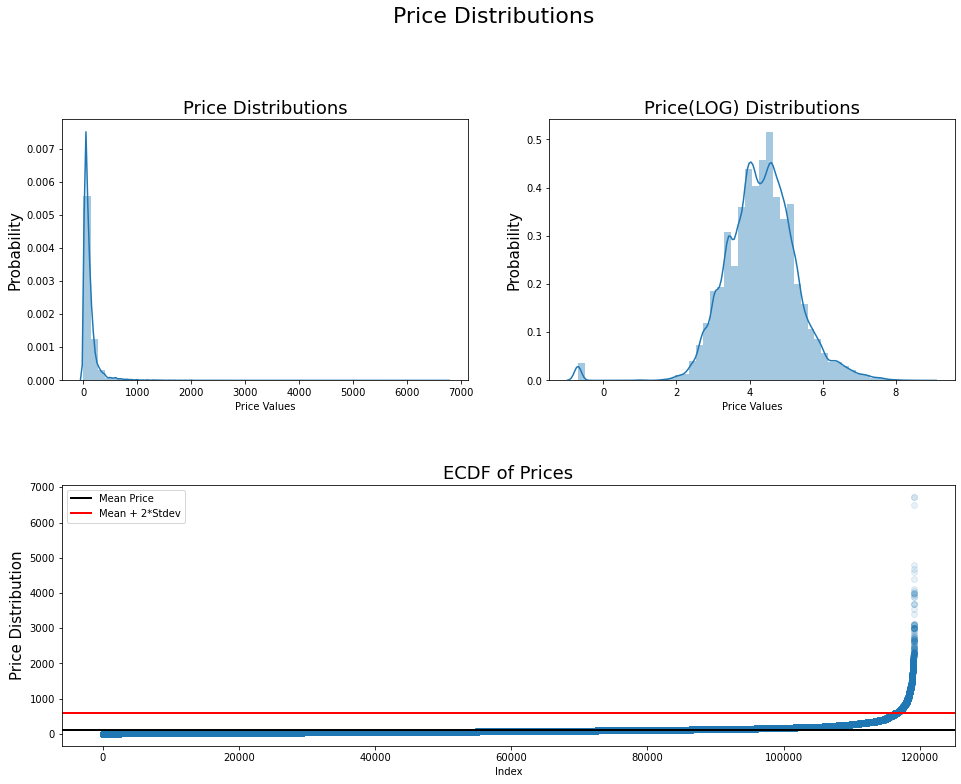

In [19]:
df_train['price'].fillna(-1, inplace=True)

plt.figure(figsize=(16,12))
plt.suptitle('Price Distributions', fontsize=22)
plt.subplot(221)
g = sns.distplot(df_train['price'])
g.set_title("Price Distributions", fontsize=18)
g.set_xlabel("Price Values")
g.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
g1 = sns.distplot(np.log(df_train['price']+1.5))
g1.set_title("Price(LOG) Distributions", fontsize=18)
g1.set_xlabel("Price Values")
g1.set_ylabel("Probability", fontsize=15)

plt.subplot(212)
g4 = plt.scatter(range(df_train.shape[0]),
                 np.sort(df_train['price'].values), 
                 alpha=.1)
g4= plt.title("ECDF of Prices", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Price Distribution", fontsize=15)
g4 = plt.axhline(df_train[df_train['price'] != -1]['price'].mean(), color='black', 
           label='Mean Price', linewidth=2)
g4 = plt.axhline(df_train[df_train['price'] != -1]['price'].mean() + (2.5*df_train[df_train['price'] != -1]['price'].std()),
                 color='red', 
           label='Mean + 2*Stdev', linewidth=2)
g4 = plt.legend()

plt.subplots_adjust(hspace = 0.4, top = 0.85)

plt.show()

In [12]:
df_train['price'].describe()

count    119151.000000
mean        119.798644
std         183.742769
min          -1.000000
25%          39.900000
50%          73.900000
75%         132.700000
max        6735.000000
Name: price, dtype: float64

Cool! It gives to us a clearly vision about the price distributions and now we now that.<br />
Mean Value is: 119.79<br />
Standard Deviation is: 183.74.<br />
In the graph, It was set as outliers all product prices that cross the bound of Mean(119.79) + 2.5x the Stdev(183.74).<br />
The bound to define outliers is BRL 580.92</p>
